In [32]:
pip install optuna-integration[sklearn]

   ---------------------------------------- 0.0/98.5 kB ? eta -:--:--
   ---------------- ----------------------- 41.0/98.5 kB 960.0 kB/s eta 0:00:01
   ---------------------------------------- 98.5/98.5 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import imblearn
print(imblearn.__version__)

0.13.0


In [2]:
from imblearn.combine import SMOTETomek
print("Smotetomek succesfully imported") 

Smotetomek succesfully imported


In [5]:
import pandas as pd
df=pd.read_csv("social_demographic.csv")
df.head()

,age,gender,sex,education,Employment_status,Personal_Net_Income_Category,Ethnic_Background,living_arrangement,marital_status,hours_on_social_media,loneliness_score,social_media_frequency,mhi5_class_2022,gender.1,Religion,Religious_Membership,political_interest,mhi5_std_score_2022
0,60.0,999,1.0,6.0,1,7.0,2.0,3.0,1.0,2.0,0,1.0,0.0,999,NaN,2.0,1.0,84.0
1,32.0,999,2.0,4.0,1,4.0,2.0,3.0,1.0,18.0,0,3.0,1.0,999,10.0,1.0,2.0,52.0
2,49.0,999,1.0,4.0,1,4.0,1.0,2.0,1.0,17.0,0,6.0,0.0,999,NaN,2.0,2.0,64.0
3,70.0,999,1.0,6.0,9,6.0,1.0,2.0,1.0,0.0,0,5.0,0.0,999,NaN,2.0,1.0,76.0
4,60.0,999,1.0,4.0,4,5.0,1.0,3.0,1.0,6.0,0,7.0,0.0,999,NaN,2.0,1.0,88.0


In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           995 non-null    float64
 1   gender                        995 non-null    int64  
 2   sex                           995 non-null    float64
 3   education                     993 non-null    float64
 4   Employment_status             995 non-null    int64  
 5   Personal_Net_Income_Category  993 non-null    float64
 6   Ethnic_Background             961 non-null    float64
 7   living_arrangement            995 non-null    float64
 8   marital_status                995 non-null    float64
 9   hours_on_social_media         995 non-null    float64
 10  loneliness_score              995 non-null    int64  
 11  social_media_frequency        986 non-null    float64
 12  mhi5_class_2022               994 non-null    float64
 13  gende

In [7]:
import pandas as pd

# Define the target variable
target_column = ['mhi5_class_2022']

# Columns that are inside blocks but MAY only be needed for error analysis
possible_error_analysis_columns = ['gender', 'Religion', 'Religious_Membership', 'political_interest','mhi5_std_score_2022', 'gender.1', 'Ethnic_Background', 'social_media_frequency' ]

# Full list of extra columns
keep_columns = target_column + possible_error_analysis_columns 




# Separate features and target
X = df.drop(columns=keep_columns) 
y = df[target_column[0]]  # Target variable



In [9]:
X= X.reset_index(drop=True)
y= y.reset_index(drop=True)

In [11]:
print(X.shape)
print(y.shape)

(995, 9)
(995,)


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           995 non-null    float64
 1   sex                           995 non-null    float64
 2   education                     993 non-null    float64
 3   Employment_status             995 non-null    int64  
 4   Personal_Net_Income_Category  993 non-null    float64
 5   living_arrangement            995 non-null    float64
 6   marital_status                995 non-null    float64
 7   hours_on_social_media         995 non-null    float64
 8   loneliness_score              995 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 70.1 KB


In [15]:
print(X.isna().sum()) 
# the classidfer cannot work if some entries have NAN

age                             0
sex                             0
education                       2
Employment_status               0
Personal_Net_Income_Category    2
living_arrangement              0
marital_status                  0
hours_on_social_media           0
loneliness_score                0
dtype: int64


In [17]:
X.loc[:, "education"] = X["education"].fillna(X["education"].mean())
X.loc[:, "Personal_Net_Income_Category"] = X["Personal_Net_Income_Category"].fillna(X["Personal_Net_Income_Category"].mean())

In [19]:
print(X.isna().sum())  # check for nan

age                             0
sex                             0
education                       0
Employment_status               0
Personal_Net_Income_Category    0
living_arrangement              0
marital_status                  0
hours_on_social_media           0
loneliness_score                0
dtype: int64


In [21]:
print(y.isna().sum())
print(y.dtype)

1
float64


In [23]:

y.dropna(inplace=True)  #drop the entry with nan
X = X.loc[y.index]    # keep X and y aligned
print(y.isna().sum())

0


Nested CROSS-Validation

In [26]:
from sklearn.model_selection import train_test_split

# Stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# this cell code should stay. sampler defination is needed for lr and random forest cell code.
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold

# Sampler dictionary
samplers = {
    'none': None,
    'undersample': RandomUnderSampler(random_state=42),
    'smotetomek': SMOTETomek(random_state=42)
}

# Outer CV (voor consistentie)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


#### Logistic Regression:

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import joblib

# Hyperparameter grid
param_grid_lr = {
    'sampler': [samplers['none'], samplers['undersample'], samplers['smotetomek']],
    'classifier__C': [0.01, 0.1, 1, 10]
}

# Pipeline
pipeline_lr = ImbPipeline([
    ('sampler', SMOTETomek()),  # wordt geswitched op basis van de param_grid_lr
    ('scaler', StandardScaler()), # hier doen na datasplit anders dataleakage niet bij preprocessing.
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# GridSearch
grid_lr = GridSearchCV(pipeline_lr, param_grid=param_grid_lr, cv=3, scoring='f1', n_jobs=-1) # cv gaat automatisch stratifiedsplit

# nested cross_validation
from sklearn.model_selection import cross_validate
nested_cv_search = cross_validate(
    grid_lr,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='f1',
    error_score='raise',
    return_estimator=True,
    return_train_score=False,
    verbose=1,
    n_jobs=-1
)
print("Nested CV results:")
print(nested_cv_search['test_score'])
print("Mean F1 score:", nested_cv_search['test_score'].mean())
print('STD F1 score:', nested_cv_search['test_score'].std())
best_score_index = np.argmax(nested_cv_search['test_score'])
best_model = nested_cv_search['estimator'][best_score_index]
print('Parameters of the best model:', best_model.best_params_)
# print the parameters of all 5 models
for i, model in enumerate(nested_cv_search['estimator']):
    print(f"Model {i+1} parameters: {model.best_params_}")

# sla de nested_cv op
joblib.dump(nested_cv_search, 'nested_cv_search_lr_social+demo.pkl')


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Nested CV results:
[0.38297872 0.36781609 0.41237113 0.29885057 0.33684211]
Mean F1 score: 0.3597717258709397
STD F1 score: 0.03900545720166664
Parameters of the best model: {'classifier__C': 0.01, 'sampler': RandomUnderSampler(random_state=42)}
Model 1 parameters: {'classifier__C': 0.01, 'sampler': RandomUnderSampler(random_state=42)}
Model 2 parameters: {'classifier__C': 10, 'sampler': SMOTETomek(random_state=42)}
Model 3 parameters: {'classifier__C': 0.01, 'sampler': RandomUnderSampler(random_state=42)}
Model 4 parameters: {'classifier__C': 10, 'sampler': RandomUnderSampler(random_state=42)}
Model 5 parameters: {'classifier__C': 0.01, 'sampler': RandomUnderSampler(random_state=42)}


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s finished


['nested_cv_search_lr_social+demo.pkl']

#### Random Forest

In [34]:
import optuna
from optuna.integration import OptunaSearchCV
from optuna.distributions import IntDistribution, CategoricalDistribution

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np
import joblib

# Sampler dictionary
samplers = {
    'none': None,
    'undersample': RandomUnderSampler(random_state=42),
    'smotetomek': SMOTETomek(random_state=42)
}

# Define sampler mapping (assumes this exists globally)
sampler_map = {
    'none': 'passthrough', # placeholder
    'undersample': samplers['undersample'],
    'smotetomek': samplers['smotetomek']
}

# Custom pipeline that resolves string samplers
class SamplerResolvingPipeline(ImbPipeline):
    def set_params(self, **kwargs):
        if 'sampler' in kwargs and isinstance(kwargs['sampler'], str):
            kwargs['sampler'] = sampler_map[kwargs['sampler']]
        return super().set_params(**kwargs)

# Pipeline
pipeline_rf = SamplerResolvingPipeline([
    ('sampler', 'passthrough'),  # placeholder.'passthrough' is the correct way to skip a pipeline step in scikit-learn.Just don’t ever pass None ( like in the samplers definition) directly into the pipeline — but you didn’t, so you’re good.
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Define Optuna hyperparameter search space
param_distributions_rf = {
    'sampler': CategoricalDistribution(['none', 'undersample', 'smotetomek']),
    'classifier__n_estimators': IntDistribution(50, 250, step=50),
    'classifier__max_depth': CategoricalDistribution([None, 5, 10, 15, 20]),
    'classifier__max_features': CategoricalDistribution(['sqrt', 'log2']),  # 'auto' deprecated
    'classifier__min_samples_split': IntDistribution(2, 10),
    'classifier__min_samples_leaf': IntDistribution(1, 4)
}

# Inner CV: 3-fold hyperparameter tuning with Optuna
optuna_search_rf = OptunaSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_distributions_rf,
    cv=3,
    n_trials=50,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Outer CV: 5-fold nested cross-validation
nested_cv_search = cross_validate(
    optuna_search_rf,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='f1',
    error_score='raise',
    return_estimator=True,
    return_train_score=False,
    verbose=1,
    n_jobs=-1
)

# Results
print("Nested CV results:")
print(nested_cv_search['test_score'])
print("Mean F1 score:", nested_cv_search['test_score'].mean())
print("STD F1 score:", nested_cv_search['test_score'].std())

# Best model across folds
best_score_index = np.argmax(nested_cv_search['test_score'])
best_model = nested_cv_search['estimator'][best_score_index]
print('Parameters of the best model:', best_model.best_params_)

# Parameters of all models
for i, model in enumerate(nested_cv_search['estimator']):
    print(f"Model {i+1} parameters: {model.best_params_}")

# Save results
joblib.dump(nested_cv_search, 'nested_cv_search_rf_social+demo.pkl')


C:\Users\u1246538\AppData\Local\Temp\ipykernel_7460\3489558747.py:52: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search_rf = OptunaSearchCV(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
C:\Users\u1246538\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:125: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   51.8s finished


Nested CV results:
[0.35294118 0.44210526 0.35294118 0.33684211 0.39252336]
Mean F1 score: 0.3754706171696421
STD F1 score: 0.03804808948041524
Parameters of the best model: {'sampler': 'undersample', 'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 3, 'classifier__min_samples_leaf': 1}
Model 1 parameters: {'sampler': 'undersample', 'classifier__n_estimators': 200, 'classifier__max_depth': 5, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 8, 'classifier__min_samples_leaf': 4}
Model 2 parameters: {'sampler': 'undersample', 'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 3, 'classifier__min_samples_leaf': 1}
Model 3 parameters: {'sampler': 'undersample', 'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 10, 'classifier__min_sam

['nested_cv_search_rf_social+demo.pkl']

In [39]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler
# from imblearn.pipeline import Pipeline as ImbPipeline
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.metrics import classification_report
# import numpy as np
# import joblib

# # Hyperparameter grid
# param_grid_rf = {
#     'sampler': [samplers['none'], samplers['undersample'], samplers['smotetomek']],
#     'classifier__n_estimators': [50, 100, 150, 200, 250],
#     'classifier__max_depth': [None, 5, 10, 15, 20],
#     'classifier__max_features': ['auto', 'sqrt'],  # ← dit was de boosdoener
#     'classifier__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'classifier__min_samples_leaf': [1, 2, 3, 4],
# }


# # Pipeline
# pipeline_rf = ImbPipeline([
#     ('sampler', SMOTETomek()),  # wordt geswitched op basis van de param_grid_rf
#     ('scaler', StandardScaler()), # hier doen na datasplit anders dataleakage niet bij preprocessing.
#     ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
# ])

# #gridsearch  # cv gaat automatisch stratifiedsplit
# grid_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=3, scoring='f1', n_jobs=-1)

# # nested cross_validation
# from sklearn.model_selection import cross_validate
# nested_cv_search = cross_validate(
#     grid_rf,
#     X=X_train,
#     y=y_train,
#     cv=5,
#     scoring='f1',
#     error_score='raise',
#     return_estimator=True,
#     return_train_score=False,
#     verbose=1,
#     n_jobs=-1
# )
# print("Nested CV results:")
# print(nested_cv_search['test_score'])
# print("Mean F1 score:", nested_cv_search['test_score'].mean())
# print('STD F1 score:', nested_cv_search['test_score'].std())
# best_score_index = np.argmax(nested_cv_search['test_score'])
# best_model = nested_cv_search['estimator'][best_score_index]
# print('Parameters of the best model:', best_model.best_params_)
# # print the parameters of all 5 models
# for i, model in enumerate(nested_cv_search['estimator']):
#     print(f"Model {i+1} parameters: {model.best_params_}")

# # sla de nested_cv op
# joblib.dump(nested_cv_search, 'nested_cv_search_rf_social+demo.pkl')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 41.0min finished


Nested CV results:
[0.34951456 0.38297872 0.36       0.32       0.40366972]
Mean F1 score: 0.36323260225633874
STD F1 score: 0.028610356135273265
Parameters of the best model: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 9, 'classifier__n_estimators': 100, 'sampler': RandomUnderSampler(random_state=42)}
Model 1 parameters: {'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 150, 'sampler': RandomUnderSampler(random_state=42)}
Model 2 parameters: {'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100, 'sampler': RandomUnderSampler(random_state=42)}
Model 3 parameters: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'class

['nested_cv_search_rf_social+demo.pkl']

#### SVM

In [31]:
import optuna
from optuna.integration import OptunaSearchCV
from optuna.distributions import CategoricalDistribution, FloatDistribution, IntDistribution

import numpy as np
import joblib
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.base import clone
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

# 1. Define your sampler map
sampler_map = {
    'none': 'passthrough',
    'undersample': RandomUnderSampler(),
    'smotetomek': SMOTETomek()
}

# 2. Custom pipeline class that resolves sampler strings
class SamplerResolvingPipeline(ImbPipeline):
    def set_params(self, **kwargs):
        if 'sampler' in kwargs and isinstance(kwargs['sampler'], str):
            kwargs['sampler'] = sampler_map[kwargs['sampler']]
        return super().set_params(**kwargs)

# 3. Define the pipeline
pipeline = SamplerResolvingPipeline([
    ('sampler', 'passthrough'),  # will be overridden
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42))
])

# 4. Define Optuna-compatible search space
param_distributions = {
    'sampler': CategoricalDistribution(['none', 'undersample', 'smotetomek']),
    'classifier__kernel': CategoricalDistribution(['linear', 'rbf', 'poly']),
    'classifier__C': FloatDistribution(0.1, 100, log=True),
    'classifier__gamma': CategoricalDistribution(['scale', 'auto', 0.1, 0.01, 0.001]),
    'classifier__degree': IntDistribution(2, 5),  # only for 'poly'
    'classifier__class_weight': CategoricalDistribution([None, 'balanced'])
}

# 5. Setup OptunaSearchCV (inner CV: 3-fold)
optuna_search = OptunaSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    cv=3,
    n_trials=50,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# 6. Outer nested cross-validation (5-fold)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
nested_cv_results = cross_validate(
    optuna_search,
    X=X_train,
    y=y_train,
    cv=outer_cv,
    scoring='f1',
    return_estimator=True,
    return_train_score=False,
    verbose=1,
    n_jobs=-1
)

# 7. Print and save results
print("Nested CV F1 scores:", nested_cv_results['test_score'])
print("Mean F1 score:", np.mean(nested_cv_results['test_score']))
print("STD F1 score:", np.std(nested_cv_results['test_score']))
print("Best parameters per fold:")
for i, model in enumerate(nested_cv_results['estimator']):
    print(f"Fold {i+1}: {model.best_params_}")
best_score_index = np.argmax(nested_cv_results['test_score'])
best_model = nested_cv_results['estimator'][best_score_index]
print("Parameters of the best overall model:", best_model.best_params_)

joblib.dump(nested_cv_results, 'nested_cv_optuna_svm.pkl')


C:\Users\u1246538\AppData\Local\Temp\ipykernel_7664\534800832.py:47: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
C:\Users\u1246538\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:125: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)


Nested CV F1 scores: [0.32941176 0.41758242 0.37362637 0.29268293 0.41758242]
Mean F1 score: 0.3661771800652719
STD F1 score: 0.04918046034425736
Best parameters per fold:
Fold 1: {'sampler': 'undersample', 'classifier__kernel': 'rbf', 'classifier__C': 0.9002687365911997, 'classifier__gamma': 0.1, 'classifier__degree': 5, 'classifier__class_weight': None}
Fold 2: {'sampler': 'none', 'classifier__kernel': 'linear', 'classifier__C': 0.15954544874843024, 'classifier__gamma': 0.01, 'classifier__degree': 3, 'classifier__class_weight': 'balanced'}
Fold 3: {'sampler': 'undersample', 'classifier__kernel': 'linear', 'classifier__C': 0.27826453624171565, 'classifier__gamma': 0.1, 'classifier__degree': 3, 'classifier__class_weight': None}
Fold 4: {'sampler': 'smotetomek', 'classifier__kernel': 'rbf', 'classifier__C': 0.33539906728461966, 'classifier__gamma': 0.001, 'classifier__degree': 5, 'classifier__class_weight': 'balanced'}
Fold 5: {'sampler': 'none', 'classifier__kernel': 'linear', 'classif

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.7s finished


['nested_cv_optuna_svm.pkl']

#### XGBoost

In [33]:
# mocht het nou echt niet werken met XGBoost(extreme gradient boosting), dan GradientBoostingClassifier die zit in sklearn
import optuna
from optuna.integration import OptunaSearchCV
from optuna.distributions import CategoricalDistribution, FloatDistribution, IntDistribution
import numpy as np
import joblib
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.base import clone
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

# 1. Define your sampler map
sampler_map = {
    'none': 'passthrough',
    'undersample': RandomUnderSampler(random_state=42),
    'smotetomek': SMOTETomek(random_state=42)
}

# 2. Custom pipeline class that resolves sampler strings
class SamplerResolvingPipeline(ImbPipeline):
    def set_params(self, **kwargs):
        if 'sampler' in kwargs and isinstance(kwargs['sampler'], str):
            kwargs['sampler'] = sampler_map[kwargs['sampler']]
        return super().set_params(**kwargs)

# 3. Define the pipeline
pipeline = SamplerResolvingPipeline([
    ('sampler', 'passthrough'),  # will be overridden
    ('scaler', StandardScaler()),
    ('classifier', xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42))
])

# 4. Define Optuna-compatible search space based on the provided hyperparameters
param_distributions = {
    'sampler': CategoricalDistribution(['none', 'undersample', 'smotetomek']),
    'classifier__n_estimators': CategoricalDistribution([50, 100, 200, 400, 500]),
    'classifier__learning_rate': FloatDistribution(0.01, 0.1, log=True),
    'classifier__max_depth': CategoricalDistribution([2, 4, 6, 10, 15]),
    'classifier__min_child_weight': CategoricalDistribution([1, 3, 5]),
    'classifier__subsample': CategoricalDistribution([0.6, 0.8, 1.0]),
    'classifier__colsample_bytree': CategoricalDistribution([0.6, 0.8, 1.0]),
    'classifier__gamma': FloatDistribution(0.0, 1.0, step=0.1),
    'classifier__reg_alpha': FloatDistribution(0.001, 5.0, log=True),  # L1 regularization
    'classifier__reg_lambda': FloatDistribution(0.001, 5.0, log=True),  # L2 regularization
}

# 5. Setup OptunaSearchCV (inner CV: 3-fold)
optuna_search = OptunaSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    cv=3,  # inner CV with 3 folds
    n_trials=50,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# 6. Outer nested cross-validation (5-fold)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
nested_cv_results = cross_validate(
    optuna_search,
    X=X_train,
    y=y_train,
    cv=outer_cv,
    scoring='f1',
    return_estimator=True,
    return_train_score=False,
    verbose=1,
    n_jobs=-1
)

# 7. Print and save results
print("Nested CV F1 scores:", nested_cv_results['test_score'])
print("Mean F1 score:", np.mean(nested_cv_results['test_score']))
print("STD F1 score:", np.std(nested_cv_results['test_score']))
print("Best parameters per fold:")
for i, model in enumerate(nested_cv_results['estimator']):
    print(f"Fold {i+1}: {model.best_params_}")

best_score_index = np.argmax(nested_cv_results['test_score'])
best_model = nested_cv_results['estimator'][best_score_index]
print("Parameters of the best overall model:", best_model.best_params_)

# Save the results
joblib.dump(nested_cv_results, 'nested_cv_optuna_xgb.pkl')

C:\Users\u1246538\AppData\Local\Temp\ipykernel_7664\183134602.py:51: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
C:\Users\u1246538\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:125: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.1s finished


Nested CV F1 scores: [0.3030303  0.36842105 0.35051546 0.37037037 0.45283019]
Mean F1 score: 0.36903347572580464
STD F1 score: 0.04842186906417823
Best parameters per fold:
Fold 1: {'sampler': 'undersample', 'classifier__n_estimators': 100, 'classifier__learning_rate': 0.02030970191719588, 'classifier__max_depth': 6, 'classifier__min_child_weight': 3, 'classifier__subsample': 0.8, 'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0.9, 'classifier__reg_alpha': 0.001047773786323205, 'classifier__reg_lambda': 0.11769324925476121}
Fold 2: {'sampler': 'undersample', 'classifier__n_estimators': 50, 'classifier__learning_rate': 0.050601576435811695, 'classifier__max_depth': 2, 'classifier__min_child_weight': 1, 'classifier__subsample': 1.0, 'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0.8, 'classifier__reg_alpha': 1.9628645450209674, 'classifier__reg_lambda': 1.9297303053692105}
Fold 3: {'sampler': 'undersample', 'classifier__n_estimators': 100, 'classifier__learning_rate

['nested_cv_optuna_xgb.pkl']

Nu checken welk model de hoogste gemiddelde F1 score heeft en die retrainen op de hele train set en testen op de hold-out test set


Best XGBoost parameters: {'sampler': 'undersample', 'classifier__n_estimators': 400, 'classifier__learning_rate': 0.049102224538023785, 'classifier__max_depth': 15, 'classifier__min_child_weight': 3, 'classifier__subsample': 1.0, 'classifier__colsample_bytree': 0.6, 'classifier__gamma': 0.6000000000000001, 'classifier__reg_alpha': 0.07656858049254477, 'classifier__reg_lambda': 0.001905984978855973}

XGBoost Test Results:
              precision    recall  f1-score   support

         0.0       0.82      0.57      0.67       157
         1.0       0.25      0.52      0.34        42

    accuracy                           0.56       199
   macro avg       0.53      0.55      0.51       199
weighted avg       0.70      0.56      0.60       199


Test Set Performance Metrics Summary:
         accuracy  precision   recall        f1   roc_auc
XGBoost  0.562814   0.247191  0.52381  0.335878  0.537079


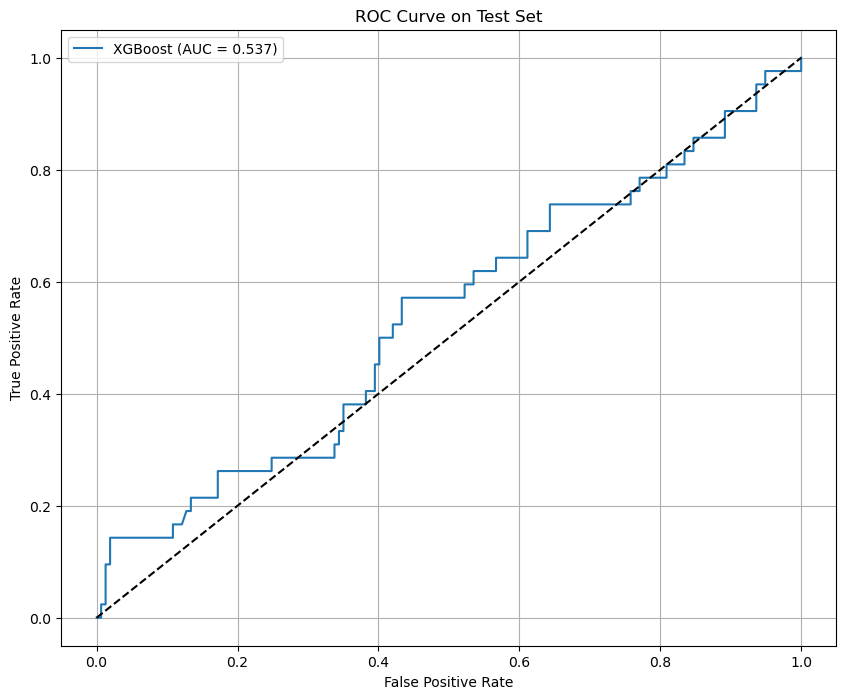

['best_xgb_model.pkl']

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import joblib

# Dictionary to store results
test_results = {}

# ----- XGBoost -----
# First, identify what variable contains your XGBoost nested CV results
# This could be named something like nested_cv_results, xgb_cv_results, etc.
# Replace 'your_xgb_cv_variable' with your actual variable name
xgb_cv_results = nested_cv_results  # Replace with your actual variable name

# Get the best XGBoost model
best_xgb_index = np.argmax(xgb_cv_results['test_score'])
best_xgb_model = xgb_cv_results['estimator'][best_xgb_index]
best_xgb_params = best_xgb_model.best_params_
print("Best XGBoost parameters:", best_xgb_params)

# Create a new pipeline with these parameters
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline

# Define your sampler map if not already defined
sampler_map = {
    'none': 'passthrough',
    'undersample': RandomUnderSampler(random_state=42),
    'smotetomek': SMOTETomek(random_state=42)
}

# Create pipeline
xgb_pipeline = ImbPipeline([
    ('sampler', sampler_map[best_xgb_params['sampler']] if 'sampler' in best_xgb_params else 'passthrough'),
    ('scaler', StandardScaler()),
    ('classifier', xgb.XGBClassifier(objective='binary:logistic', random_state=42))
])

# Set classifier parameters
classifier_params = {k: v for k, v in best_xgb_params.items() if k.startswith('classifier__')}
xgb_pipeline.set_params(**classifier_params)

# Fit on the entire training data
xgb_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_pipeline.predict(X_test)
y_prob_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

# Calculate metrics
test_results['XGBoost'] = {
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'precision': precision_score(y_test, y_pred_xgb),
    'recall': recall_score(y_test, y_pred_xgb),
    'f1': f1_score(y_test, y_pred_xgb),
    'roc_auc': roc_auc_score(y_test, y_prob_xgb)
}

print("\nXGBoost Test Results:")
print(classification_report(y_test, y_pred_xgb))

# Create a DataFrame to display results
results_df = pd.DataFrame(test_results).T
print("\nTest Set Performance Metrics Summary:")
print(results_df)

# Plot ROC curve for XGBoost
plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_prob_xgb):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# Save the XGBoost model
joblib.dump(xgb_pipeline, 'best_xgb_model.pkl')